In [1]:
import tensorflow as tf
print(tf.__version__)

2023-02-02 21:42:25.658853: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-02 21:42:25.658911: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
digits = pd.read_csv('train.csv')

In [4]:
X = digits.iloc[:,1:]/255
y = digits.label
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [5]:
x_train = x_train.to_numpy().reshape(28140,28,28)
x_test = x_test.to_numpy().reshape(13860,28,28)

In [6]:
x_train.shape

(28140, 28, 28)

In [7]:
weight_decay = 1e-4
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=[28,28,1]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
 
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
 
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                        

2023-02-02 21:44:24.410078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 21:44:24.410338: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-02 21:44:24.410420: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-02 21:44:24.410477: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-02 21:44:24.425574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

_________________________________________________________________


In [12]:
opt = tf.keras.optimizers.Adam(lr=0.001)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn,
              optimizer=opt,
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=64,
                    epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10


2023-02-02 21:58:07.133764: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 88247040 exceeds 10% of free system memory.
/home/rc/.virtualenvs/tensor_flow/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


440/440 [==============================] - 50s 113ms/step - loss: 0.0840 - accuracy: 0.9929 - val_loss: 0.0884 - val_accuracy: 0.9916
Epoch 2/10
440/440 [==============================] - 47s 107ms/step - loss: 0.0847 - accuracy: 0.9926 - val_loss: 0.0838 - val_accuracy: 0.9921
Epoch 3/10
440/440 [==============================] - 47s 106ms/step - loss: 0.0791 - accuracy: 0.9932 - val_loss: 0.0856 - val_accuracy: 0.9912
Epoch 4/10
440/440 [==============================] - 47s 106ms/step - loss: 0.0722 - accuracy: 0.9942 - val_loss: 0.0926 - val_accuracy: 0.9892
Epoch 5/10
440/440 [==============================] - 46s 106ms/step - loss: 0.0776 - accuracy: 0.9927 - val_loss: 0.0933 - val_accuracy: 0.9893
Epoch 6/10
440/440 [==============================] - 47s 107ms/step - loss: 0.0723 - accuracy: 0.9939 - val_loss: 0.0867 - val_accuracy: 0.9909
Epoch 7/10
440/440 [==============================] - 46s 106ms/step - loss: 0.0729 - accuracy: 0.9939 - val_loss: 0.0863 - val_accuracy: 0.9

In [14]:
prediction = model.predict(x_test).argmax(1)

434/434 [==============================] - 5s 11ms/step


In [15]:
y_test_df =y_test.reset_index(drop=True).reset_index()
y_test_df['prediction']= prediction

In [16]:
y_test_df[y_test_df.prediction!=y_test_df.label]

,index,label,prediction
43,43,3,7
66,66,6,4
632,632,3,8
703,703,8,9
787,787,4,9
...,...,...,...
13385,13385,5,0
13605,13605,3,0
13637,13637,9,7
13711,13711,8,6


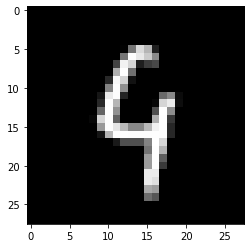

In [21]:
plt.imshow(x_test[787],cmap='gray')

In [22]:
y_test_df.shape

(13860, 3)

In [32]:
test_kaggle = pd.read_csv('test.csv')/255.0
test_kaggle = test_kaggle.to_numpy().reshape(28000,28,28)

In [35]:
prediction = model.predict(test_kaggle).argmax(1)

 11/875 [..............................] - ETA: 9s

2023-02-02 22:39:16.606863: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 87808000 exceeds 10% of free system memory.


875/875 [==============================] - 10s 11ms/step


In [38]:
pd.DataFrame(prediction).to_clipboard()